In [12]:
import numpy as np
import tensorflow as tf
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

from IPython.display import Image
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Activation
import pickle

%matplotlib inline

#### unzipping dataset

In [14]:
!unzip -q "/content/Sign-Language-Digits-Dataset-master.zip"

replace Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1118.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


loading dataset into training validation and test folder

In [15]:
os.chdir("Sign-Language-Digits-Dataset-master/Dataset")
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0,10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
                 
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
                 
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
        
os.chdir('../..')

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [18]:
for i in range(0, 10):
    assert len(os.listdir(f'Sign-Language-Digits-Dataset-master/Dataset/valid/{i}')) == 30
    assert len(os.listdir(f'Sign-Language-Digits-Dataset-master/Dataset/test/{i}')) == 5

In [19]:
train_path = 'Sign-Language-Digits-Dataset-master/Dataset/train/'
valid_path = 'Sign-Language-Digits-Dataset-master/Dataset/valid/'
test_path = 'Sign-Language-Digits-Dataset-master/Dataset/test/'

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [21]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50

In [22]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [23]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [24]:
# assert params['non_trainable_params'] == 21888 
# assert params['trainable_params'] == 4231976

In [25]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [26]:
model = Model(inputs=mobile.input, outputs = output)

In [27]:
for layer in model.layers[:-20]:
  layer.trainable = False

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [29]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x = train_batches, validation_data = valid_batches, epochs=30, verbose=2)

Epoch 1/30
172/172 - 14s - loss: 0.6009 - accuracy: 0.8236 - val_loss: 1.5057 - val_accuracy: 0.4900
Epoch 2/30
172/172 - 5s - loss: 0.1042 - accuracy: 0.9848 - val_loss: 1.2600 - val_accuracy: 0.6067
Epoch 3/30
172/172 - 5s - loss: 0.0597 - accuracy: 0.9924 - val_loss: 1.3543 - val_accuracy: 0.5433
Epoch 4/30
172/172 - 5s - loss: 0.0364 - accuracy: 0.9947 - val_loss: 1.1941 - val_accuracy: 0.6100
Epoch 5/30
172/172 - 5s - loss: 0.0243 - accuracy: 0.9982 - val_loss: 1.3424 - val_accuracy: 0.5833
Epoch 6/30
172/172 - 5s - loss: 0.0154 - accuracy: 0.9994 - val_loss: 1.1838 - val_accuracy: 0.5600
Epoch 7/30
172/172 - 5s - loss: 0.0126 - accuracy: 0.9982 - val_loss: 1.5519 - val_accuracy: 0.4767
Epoch 8/30
172/172 - 5s - loss: 0.0091 - accuracy: 0.9994 - val_loss: 1.3533 - val_accuracy: 0.5200
Epoch 9/30
172/172 - 5s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.2660 - val_accuracy: 0.5600
Epoch 10/30
172/172 - 5s - loss: 0.0089 - accuracy: 0.9988 - val_loss: 1.4989 - val_accuracy: 0.503

In [31]:
test_labels = test_batches.classes 

In [39]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

predicting the sign language

In [40]:
predictions = model.predict(test_batches, verbose=0)

In [43]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=5)
  plt.yticks(ticks_marks, classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion Matrix")
  else:
    print('confusion matrix, without normalization')
  
  print(cm)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('predicted labels')


In [44]:
cm = confusion_matrix(y_true = test_labels, y_pred=predictions.argmax(axis=1))

In [45]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

NameError: ignored

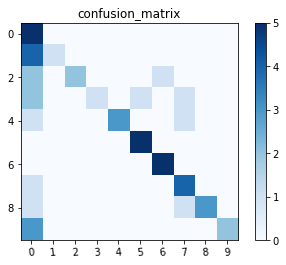

In [49]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')